### Load the dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\paulj\OneDrive\Desktop\COding\DSA\Assignment\Assignment 5\titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  PassengerId as the index

In [4]:
df.set_index('PassengerId', inplace=True)

### Basic Details

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
for i in ['Age']:
    df[i]=df[i].fillna(df[i].median())

In [11]:
for i in ['Cabin']:
    df[i]=df[i].fillna('Unknown')

In [12]:
for i in ['Embarked']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Handle outliers

In [14]:
outlier_columns = df[['Fare', 'Age', 'SibSp']]

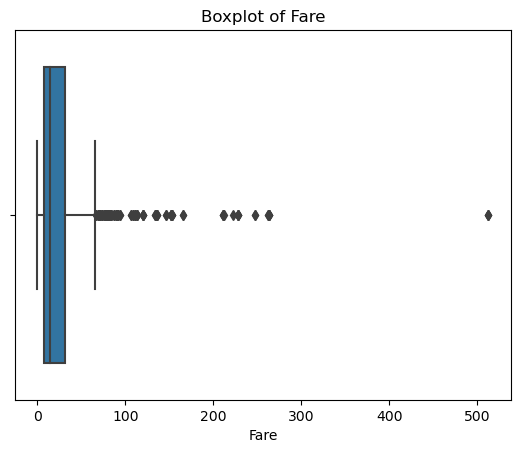

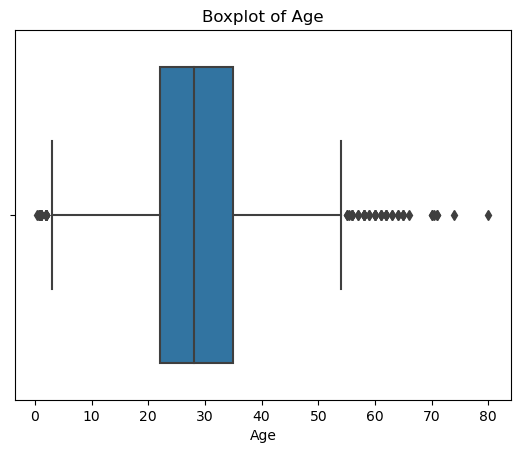

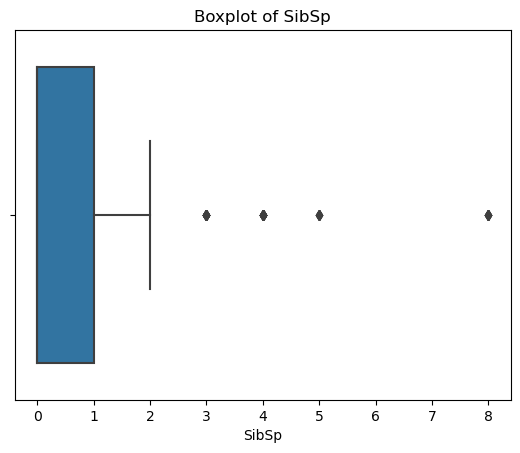

In [15]:
for column in outlier_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [16]:
from scipy.stats.mstats import winsorize
df['Fare'] = winsorize(df['Fare'], limits=[0.05, 0.05])

In [17]:
median_age = df['Age'].median()
df.loc[df['Age'] < 0, 'Age'] = median_age
df.loc[df['Age'] > 100, 'Age'] = median_age

### min max scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
x = df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'], axis=1)
y = df[['Survived','Name','Sex','Ticket','Cabin','Embarked']]

In [20]:
features_scaled = scaler.fit_transform(x)

In [23]:
features_scaled = pd.DataFrame(features_scaled, columns=x.columns, index=x.index)
features_scaled[['Survived','Name','Sex','Ticket','Cabin','Embarked']] = y

In [24]:
features_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1.0,0.271174,0.125,0.0,0.000236,0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
2,0.0,0.472229,0.125,0.0,0.604039,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,1.0,0.321438,0.000,0.0,0.006601,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
4,0.0,0.434531,0.125,0.0,0.432579,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,1.0,0.434531,0.000,0.0,0.007779,0,"Allen, Mr. William Henry",male,373450,Unknown,S
